<a href="https://colab.research.google.com/github/PrishaTHE-PRO/Project-C-119/blob/main/Project_C_119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load=files.upload()

Saving Project C-119.csv to Project C-119.csv


In [ ]:
import pandas as pd 
import plotly.express as px 
col_names=['passengerId','pclass','sex','age','sibSp','parch','survived']
df=pd.read_csv('Project C-119.csv',names=col_names).iloc[1:]
print(df.head())

  passengerId pclass sex   age sibSp parch survived
1           1      3   1  34.5     1     0        0
2           2      1   0    47     1     0        1
3           3      3   0    62     0     0        1
4           4      1   0    27     1     0        1
5           5      3   1    22     0     0        0


In [ ]:
features=['passengerId','pclass','sex','age','sibSp','parch','survived']
X=df[features]
y=df.survived

In [9]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
clf=DecisionTreeClassifier(max_depth=2)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('accuracy',metrics.accuracy_score(y_test,y_pred))

accuracy 1.0


In [10]:
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus

dot_data=StringIO()
#export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<survived &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<gini = 0.0<br/>samples = 396<br/>value = [396, 0]<br/>class = 0>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 227<br/>value = [0, 227]<br/>class = 1>, fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


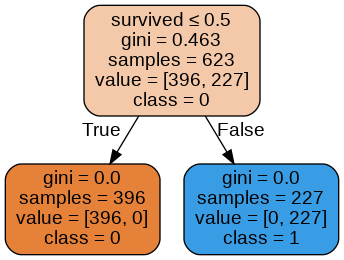

In [11]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabeties.png')
Image(graph.create_png())